### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [23]:
import tensorflow as tf
import keras
tf.__version__

'1.15.0'

#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train_str), (x_test, y_test_str) = fashion_mnist.load_data()

#### Change train and test labels into one-hot vectors

In [0]:
y_train = tf.keras.utils.to_categorical(y_train_str, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test_str, num_classes=10)

In [26]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Build the Graph

#### Initialize model, reshape & normalize data

Normalizing Data

In [0]:
x_train = x_train/255
x_test = x_test/255

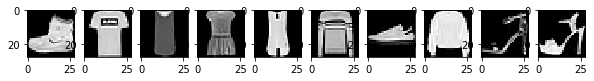

In [28]:
#Lets print the image after normalization 
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 10))
for i in range(1, 11,1):
  fig.add_subplot(1, 10, i)
  plt.imshow(x_train[i-1],cmap='gray')
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import BatchNormalization, MaxPooling2D
from keras.utils import np_utils

In [0]:
    model1 = Sequential()

    # Flatten Imgaes to Vector
    model1.add(Reshape((784,), input_shape=(28, 28, )))
    model1.add(BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [31]:
    # Layer 1
    model1.add(Dense(output_dim=200, init='he_normal', bias=True))
    model1.add(Activation("relu"))

    # Layer 2
    model1.add(Dense(output_dim=100, init='he_normal', bias=True))
    model1.add(Activation("relu"))

    model1.add(Dropout(0.25))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=200, kernel_initializer="he_normal", use_bias=True)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=100, kernel_initializer="he_normal", use_bias=True)`
  """


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [32]:
# Layer 3
    model1.add(Dense(output_dim=10, init='he_normal', bias=True))
    model1.add(Activation("softmax"))

     # Loss and Optimizer
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]# [stats, early_stopping]

    # Train the model
    model1.fit(x_train, y_train, nb_epoch=25, batch_size=32,
              validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, kernel_initializer="he_normal", use_bias=True)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 13s 211us/step - loss: 0.5187 - acc: 0.8144 - val_loss: 0.4164 - val_acc: 0.8489
Epoch 2/25
60000/60000 [==============================] - 12s 197us/step - loss: 0.3975 - acc: 0.8538 - val_loss: 0.3701 - val_acc: 0.8602
Epoch 3/25
60000/60000 [==============================] - 12s 198us/step - loss: 0.3645 - acc: 0.8666 - val_loss: 0.3552 - val_acc: 0.8691
Epoch 4/25
60000/60000 [==============================] - 12s 200us/step - loss: 0.3375 - acc: 0.8763 - val_loss: 0.3520 - val_acc: 0.8703
Epoch 5/25
60000/60000 [==============================] - 12s 196us/step - loss: 0.3169 - acc: 0.8821 - val_loss: 0.3390 - val_acc: 0.8808
Epoch 6/25
60000/60000 [==============================] - 12s 199us/step - loss: 0.2978 - acc: 0.8894 - val_loss: 0.3419 - val_acc: 0.8799
Epoch 7/25
60000/60000 [==============================] - 12s 196us/step - loss: 0.2859 - acc: 0.8932 - val_loss: 0.